In [17]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
drive.mount('/content/drive')

ValueError: mount failed

In [18]:
application_train = pd.read_csv("/content/drive/MyDrive/Data403Materials/homeCreditData/home-credit-default-risk/application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
application_test = pd.read_csv("/content/drive/MyDrive/Data403Materials/homeCreditData/home-credit-default-risk/application_test.csv")
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
column_names = application_train.columns.tolist()
print("Number of columns:", len(column_names))
print("\nColumn names:")
for name in column_names:
    print(name)


Number of columns: 122

Column names:
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVING

In [21]:
top_20_train = application_train[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'TOTALAREA_MODE', 'TARGET']]

top_20_test = application_test[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'TOTALAREA_MODE']]

In [22]:
X_train = top_20_train.drop(columns='TARGET')
y_train = top_20_train['TARGET']

X_test = top_20_test

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X = top_20_train.drop(columns='TARGET')
y = top_20_train['TARGET']

X_imputed = X.fillna(X.mean())
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(X_train, y_train)

train_pred = ldaModel.predict(X_train)
test_pred = ldaModel.predict(X_test)

In [23]:
def accuracy(y_true, y_pred):
  correct_preds = sum(y_true == y_pred)
  accuracy = correct_preds / len(y_true)
  return accuracy

def f1(y_true, y_pred):
  tp = np.sum((y_true == 1) & (y_pred == 1))
  fp = np.sum((y_true == 0) & (y_pred == 1))
  fn = np.sum((y_true == 1) & (y_pred == 0))

  precision = tp / (tp + fp) if (tp + fp) > 0 else 0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0
  f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  return f1

def roc_auc(y_true, y_proba):
  sorted_indices = np.argsort(y_proba)
  y_true_sorted = y_true[sorted_indices]
  y_proba_sorted = y_proba[sorted_indices]

  tpr_values = []
  fpr_values = []
  thresholds = np.unique(y_proba_sorted)

  P = np.sum(y_true == 1)
  N = np.sum(y_true == 0)

  for threshold in thresholds:
      y_pred = (y_proba_sorted >= threshold).astype(int)

      TP = np.sum((y_true_sorted == 1) & (y_pred == 1))
      FP = np.sum((y_true_sorted == 0) & (y_pred == 1))

      TPR = TP / P if P > 0 else 0
      FPR = FP / N if N > 0 else 0

      tpr_values.append(TPR)
      fpr_values.append(FPR)

  fpr_values = np.array(fpr_values)
  tpr_values = np.array(tpr_values)

  auc = np.trapz(tpr_values, fpr_values)
  return auc



In [24]:
train_accuracy = accuracy(y_train, train_pred)
test_accuracy = accuracy(y_test, test_pred)

print('TRAIN ACCURACY: ', train_accuracy)
print('TEST ACCURACY: ', test_accuracy)

TRAIN ACCURACY:  0.9190839322298462
TEST ACCURACY:  0.9194998617953596


In [25]:
train_f1 = f1(y_train, train_pred)
test_f1 = f1(y_test, test_pred)

print('TRAIN F1 Score: ', train_f1)
print('TEST F1 Score: ', test_f1)

TRAIN F1 Score:  0.026982109688141562
TEST F1 Score:  0.02826300294406281


In [26]:
y_train_proba = ldaModel.predict_proba(X_train)
y_test_proba = ldaModel.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc(y_test.values, y_test_proba)
print('TEST ROC-AUC Score: ', test_roc_auc)

TEST ROC-AUC Score:  -0.7307598722801696


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_train_proba = ldaModel.predict_proba(X_train)
y_test_proba = ldaModel.predict_proba(X_test)


if len(ldaModel.classes_) == 2:
    train_roc_auc = roc_auc_score(y_train, y_train_proba[:, 1])
    test_roc_auc = roc_auc_score(y_test, y_test_proba[:, 1])
else:
    y_train_binarized = label_binarize(y_train, classes=ldaModel.classes_)
    y_test_binarized = label_binarize(y_test, classes=ldaModel.classes_)

    train_roc_auc = roc_auc_score(y_train_binarized, y_train_proba, average='weighted', multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test_binarized, y_test_proba, average='weighted', multi_class='ovr')


print(f"Training ROC AUC: {train_roc_auc:.4f}")
print(f"Testing ROC AUC: {test_roc_auc:.4f}")


Training ROC AUC: 0.7285
Testing ROC AUC: 0.7308


In [28]:
application_train_all = pd.read_csv("/content/drive/MyDrive/data403project2/merged_df_train_raw.csv")
application_train_all.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PRODUCT_COMBINATION_Cash X-Sell: low_sum,PRODUCT_COMBINATION_Cash X-Sell: middle_sum,PRODUCT_COMBINATION_POS household with interest_sum,PRODUCT_COMBINATION_POS household without interest_sum,PRODUCT_COMBINATION_POS industry with interest_sum,PRODUCT_COMBINATION_POS industry without interest_sum,PRODUCT_COMBINATION_POS mobile with interest_sum,PRODUCT_COMBINATION_POS mobile without interest_sum,PRODUCT_COMBINATION_POS other with interest_sum,PRODUCT_COMBINATION_POS others without interest_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
application_test_all = pd.read_csv("/content/drive/MyDrive/data403project2/merged_df_test_raw.csv")
application_test_all.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PRODUCT_COMBINATION_Cash X-Sell: low_sum,PRODUCT_COMBINATION_Cash X-Sell: middle_sum,PRODUCT_COMBINATION_POS household with interest_sum,PRODUCT_COMBINATION_POS household without interest_sum,PRODUCT_COMBINATION_POS industry with interest_sum,PRODUCT_COMBINATION_POS industry without interest_sum,PRODUCT_COMBINATION_POS mobile with interest_sum,PRODUCT_COMBINATION_POS mobile without interest_sum,PRODUCT_COMBINATION_POS other with interest_sum,PRODUCT_COMBINATION_POS others without interest_sum
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
top_features_train = application_train_all[[ 'TARGET']]

top_features_test = application_test_all[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'TOTALAREA_MODE']]

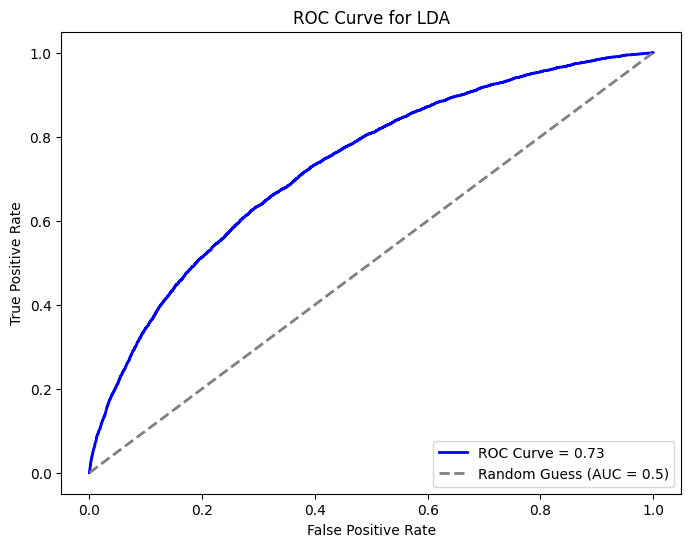

In [31]:

from sklearn.metrics import roc_curve, auc

y_pred = ldaModel.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc_ = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC Curve = {roc_auc_:.2f}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA')
plt.legend(loc="lower right")
plt.show()

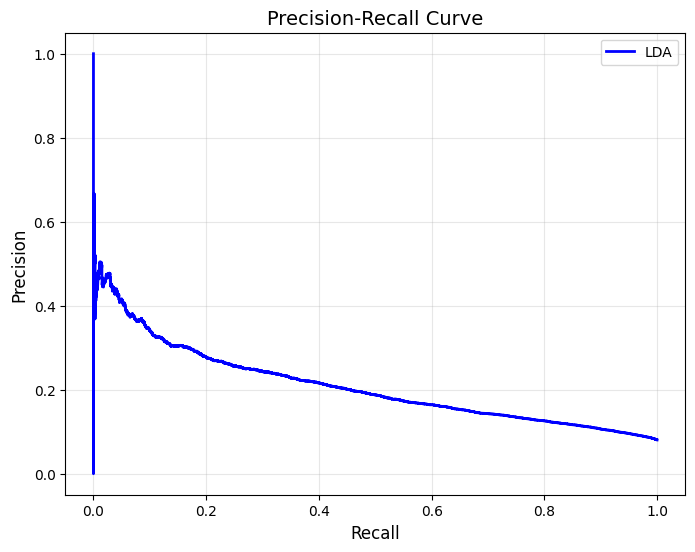

In [32]:
test_proba = ldaModel.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2, label='LDA')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()